In [1]:
from unstructured.partition.pdf import partition_pdf

/Users/nikki/Documents/Agentic AI/Assignments/Multimodal-RAG/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os

# Set the Poppler path manually so that pdf2image finds it
os.environ["PATH"] += os.pathsep + "/opt/homebrew/bin"

# Then call your function
raw_pdf_elements = partition_pdf(
    filename="data/journal.pdf",
    strategy="hi_res",
    extract_images_in_pdf=True,
    extract_image_block_types=["Image", "Table"],
    extract_image_block_to_payload=False,
    extract_image_block_output_dir="extracted_data",
)


In [3]:
raw_pdf_elements

In [4]:
raw_pdf_elements[0]

In [5]:
Header=[]
Footer=[]
Title=[]
NarrativeText=[]
Text=[]
ListItem=[]
for element in raw_pdf_elements:
  if "unstructured.documents.elements.Header" in str(type(element)):
            Header.append(str(element))
  elif "unstructured.documents.elements.Footer" in str(type(element)):
            Footer.append(str(element))
  elif "unstructured.documents.elements.Title" in str(type(element)):
            Title.append(str(element))
  elif "unstructured.documents.elements.NarrativeText" in str(type(element)):
            NarrativeText.append(str(element))
  elif "unstructured.documents.elements.Text" in str(type(element)):
            Text.append(str(element))
  elif "unstructured.documents.elements.ListItem" in str(type(element)):
            ListItem.append(str(element))





In [6]:
Image=[]
for element in raw_pdf_elements:
  if "unstructured.documents.elements.Image" in str(type(element)):
            Image.append(str(element))

In [7]:
Table=[]
for element in raw_pdf_elements:
  if "unstructured.documents.elements.Table" in str(type(element)):
            Table.append(str(element))

In [8]:
Table

['S/N Name Description Categorization 1. Age Age of the respondents Continuous variable (yearly) 2. Education Educational level Can’t read and write, Read and write only, Primary, Secondary, Diploma and above 3. Walking Walking at least 10 minutes Yes, No 4. Weight Weight of the respondents Continuous variable (kg) 5. BMI Body mass status Underweight, Normal, Overweight, Obese 6. Smoking Smoking status Yes, No 7. Drinking Drinking alcohol Yes, No 8. Vegetable Eat fruit at least per week Yes, No 9. Fat Eating animal fat Yes, No 10. Salt Eating habit salt Yes, No 11. Transport Mode of transport On foot/pedal bicycle, Engine 12. HD History of diabetes Yes, No 13. HHTN History of hypertension Yes, No',
 'Balancing Method Models Accuracy Precision Recall F1-Score AUC Under Sampling LGBM 87.43 88.14 92.75 78.6 0.878 LR 83.82 86.47 89.65 82.53 0.844 ANN 86.34 81.54 93.06 84.08 0.879 RF 82.51 86.84 94.48 53.01 0.777 XGB 84.69 88.30 84.41 69.56 0.785 ADASYN LGBM 92.61 91.24 94.12 92.46 0.943 LR

In [9]:
from dotenv import load_dotenv
load_dotenv()

True

In [10]:
import os

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ['HF_TOKEN']=os.getenv("HF_TOKEN")
os.environ['GOOGLE_API_KEY'] = os.getenv('GOOGLE_API_KEY')

## Langsmith Tracking And Tracing
os.environ["LANGCHAIN_API_KEY"]=os.getenv("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_PROJECT"]=os.getenv("LANGCHAIN_PROJECT")
os.environ["LANGCHAIN_TRACING_V2"]="true"


In [11]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

## Table Summary

In [12]:
# Prompt
prompt_text = """You are an assistant tasked with summarizing tables for retrieval. \
    These summaries will be embedded and used to retrieve the raw table elements. \
    Give a concise summary of the table that is well optimized for retrieval. Table:{element} """

In [13]:
prompt = ChatPromptTemplate.from_template(prompt_text)

In [14]:
# Text summary chain
model = ChatOpenAI(temperature=0, model="gpt-4")
summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

In [15]:
table_summaries = summarize_chain.batch(Table,{"max_concurrency":5})

In [16]:
table_summaries

['The table contains demographic and lifestyle information about respondents. It includes age and weight as continuous variables, education level ranging from illiteracy to diploma and above, and binary variables for activities like walking for at least 10 minutes, smoking, drinking alcohol, eating fruits and animal fat weekly, and salt consumption. It also records the mode of transport used and medical history regarding diabetes and hypertension.',
 'The table presents the performance metrics of various balancing method models including Under Sampling (LGBM, LR, ANN, RF, XGB), ADASYN (LGBM, LR, ANN, RF, XGB), and a Proposed Stacking method. Metrics include accuracy, precision, recall, F1-Score, and AUC. The Proposed Stacking method shows the highest performance across all metrics, with an accuracy of 96.32%, precision of 95.48%, recall of 97.51%, F1-Score of 96.48%, and AUC of 0.971. Among the Under Sampling and ADASYN methods, LGBM generally performs best.',
 'The table provides a su

In [17]:
len(Table)

3

## Text Summary

In [18]:
len(Text)

8

In [19]:
# Prompt
prompt_text = """You are an assistant tasked with summarizing texts for retrieval. \
    These summaries will be embedded and used to retrieve the raw text elements. \
    Give a concise summary of the text that is well optimized for retrieval.text:{element} """

In [20]:
prompt = ChatPromptTemplate.from_template(prompt_text)

In [21]:
# Text summary chain
model = ChatOpenAI(temperature=0, model="gpt-4")
summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

In [22]:
text_summaries = summarize_chain.batch(Text,{"max_concurrency":8})

In [23]:
text_summaries

['The text consists solely of the alphanumeric sequence "a1111111111".',
 'The text consists solely of the alphanumeric sequence "a1111111111".',
 'The text consists of a repeated numerical sequence: "1111111111".',
 'The text consists of a repeated numerical sequence: "1111111111".',
 "The text consists of a repeated single character, specifically the number '1', ten times in a row.",
 'The text is not provided, please provide the text to be summarized.',
 'The text provided does not contain any information to summarize. Please provide a valid text.',
 'The text "26." appears to be a numerical or list item and does not provide any substantial information to summarize.']

## Image Summary

In [24]:
import base64
from langchain_core.messages import HumanMessage

In [25]:
def encode_image(image_path):
    """Getting the base64 string"""
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")


In [26]:
def image_summarize(img_base64, prompt):
    """Make image summary"""
    chat = ChatOpenAI(model="gpt-4o", max_tokens=1024)

    msg = chat.invoke(
        [
            HumanMessage(
                content=[
                    {"type": "text", "text": prompt},
                    {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/jpeg;base64,{img_base64}"},
                    },
                ]
            )
        ]
    )
    return msg.content

In [27]:
def generate_img_summaries(path):
    """
    Generate summaries and base64 encoded strings for images
    path: Path to list of .jpg files extracted by Unstructured
    """

    # Store base64 encoded images
    img_base64_list = []

    # Store image summaries
    image_summaries = []

    # Prompt
    prompt = """You are an assistant tasked with summarizing images for retrieval. \
    These summaries will be embedded and used to retrieve the raw image. \
    Give a concise summary of the image that is well optimized for retrieval."""

    # Apply to images
    for img_file in sorted(os.listdir(path)):
        if img_file.endswith(".jpg"):
            img_path = os.path.join(path, img_file)
            base64_image = encode_image(img_path)
            img_base64_list.append(base64_image)
            image_summaries.append(image_summarize(base64_image, prompt))

    return img_base64_list, image_summaries



In [28]:
fpath="./extracted_data/"

In [29]:
img_base64_list, image_summaries = generate_img_summaries(fpath)

In [30]:
image_summaries

['Icon with circular design, red bookmark symbol inside, and the text "Check for updates" below.',
 'Black unlocked padlock icon on a white background.',
 'SHAP summary plot displaying feature impacts on model output, with features like Weight, Physical inactivity, and Drink. Color gradient from blue (low) to pink (high) representing feature values, and SHAP values along the x-axis indicating impact.',
 'Flowchart illustrating a machine learning pipeline for hypertension data (HTN). Stages include data preprocessing, handling missing values/outliers, data splitting (70% training, 30% testing), data balancing (ADASYN, under-sampling), feature selection (Boruta, LAR, FBS, RF), ML algorithm training, hyperparameter tuning, prediction model generation (LGBM, LR, ANN, RF, XGB), and model evaluation (accuracy, precision, recall, F1-score, AUC). Global and local model interpretation using SHAP analysis.',
 "ROC curve comparison of machine learning models, including Stacking, LGBM, RF, XGB, AN

In [31]:
img_base64_list

['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCACIAGkDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooqjqerWmkwCS5f5m+5GvLN9BTSbdkTKSiuaTsi9UM91b2wzPPFEP+mjhf515/qXivUL1isL/Zoeyxn5vxb/DFYbMzsWYksepJ610xwzfxM8yrmkU7QVz1I65pYbH9oW+f98VYgvrS5OILqGU+iSAmvJKKp4VdzJ

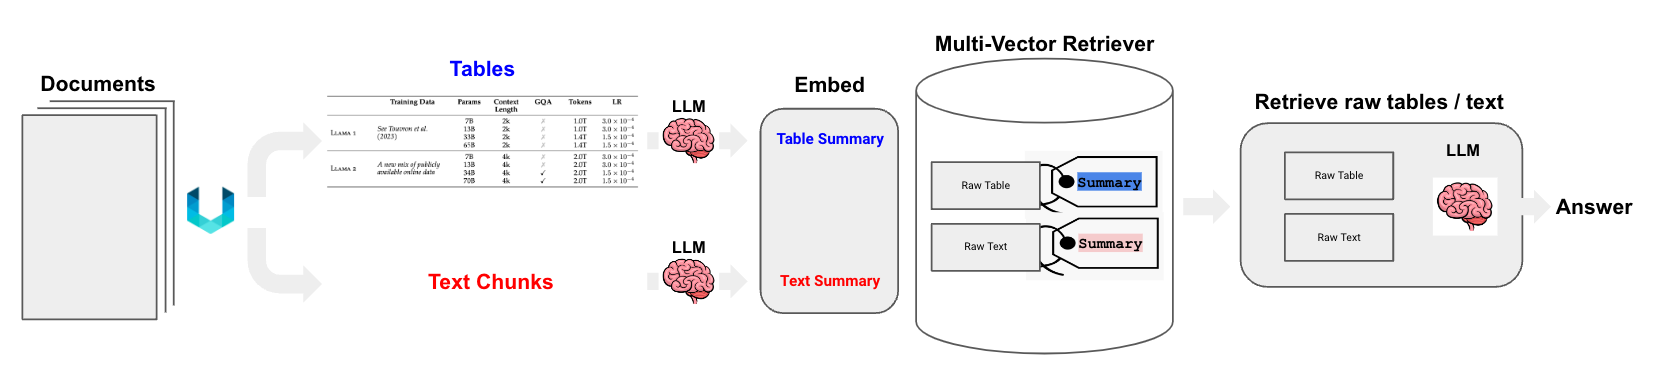

In [32]:
import uuid

from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain.storage import InMemoryStore
from langchain_community.vectorstores import Chroma
from langchain_core.documents import Document
from langchain_openai import OpenAIEmbeddings

In [33]:
def create_multi_vector_retriever(vectorstore, text_summaries, texts, table_summaries, tables, image_summaries, images):
    """
    Create retriever that indexes summaries, but returns raw images or texts
    """

    # Initialize the storage layer
    store = InMemoryStore()
    id_key = "doc_id"

    # Create the multi-vector retriever
    retriever = MultiVectorRetriever(
        vectorstore=vectorstore,
        docstore=store,
        id_key=id_key,
    )


    # Helper function to add documents to the vectorstore and docstore
    def add_documents(retriever, doc_summaries, doc_contents):

      doc_ids = [str(uuid.uuid4()) for _ in doc_contents]

      summary_docs = [
              Document(page_content=s, metadata={id_key: doc_ids[i]})
              for i, s in enumerate(doc_summaries)
          ]

      retriever.vectorstore.add_documents(summary_docs)
      retriever.docstore.mset(list(zip(doc_ids, doc_contents)))

      # Add texts, tables, and images
      # Check that text_summaries is not empty before adding
      if text_summaries:
          add_documents(retriever, text_summaries, texts)
      # Check that table_summaries is not empty before adding
      if table_summaries:
          add_documents(retriever, table_summaries, tab)
      # Check that image_summaries is not empty before adding
      if image_summaries:
          add_documents(retriever, image_summaries, img)

    return retriever

vectorstore = Chroma(
    collection_name="mmrag", embedding_function=OpenAIEmbeddings()
)

# Create retriever
retriever_multi_vector_img = create_multi_vector_retriever(
    vectorstore,
    text_summaries,
    Text,
    table_summaries,
    Table,
    image_summaries,
    img_base64_list,
)

/var/folders/8g/sz3w79_54bgdwgjzjt0tn92h0000gn/T/ipykernel_83716/3889196363.py:44: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore = Chroma(


In [34]:
retriever_multi_vector_img

MultiVectorRetriever(vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x3264f5510>, docstore=<langchain_core.stores.InMemoryStore object at 0x3268e7890>, search_kwargs={})

In [53]:
retriever_multi_vector_img.invoke('what is journal?')

[]

In [35]:
import io
import re

from IPython.display import HTML, display
from PIL import Image

In [36]:
def plt_img_base64(img_base64):
    """Disply base64 encoded string as image"""
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # Display the image by rendering the HTML
    display(HTML(image_html))


In [37]:
plt_img_base64(img_base64_list[1])

In [38]:
image_summaries[1]

'Black unlocked padlock icon on a white background.'

In [39]:
def looks_like_base64(sb):
    """Check if the string looks like base64"""
    return re.match("^[A-Za-z0-9+/]+[=]{0,2}$", sb) is not None


In [40]:
def is_image_data(b64data):
    """
    Check if the base64 data is an image by looking at the start of the data
    """
    image_signatures = {
        b"\xFF\xD8\xFF": "jpg",
        b"\x89\x50\x4E\x47\x0D\x0A\x1A\x0A": "png",
        b"\x47\x49\x46\x38": "gif",
        b"\x52\x49\x46\x46": "webp",
    }
    try:
        header = base64.b64decode(b64data)[:8]  # Decode and get the first 8 bytes
        for sig, format in image_signatures.items():
            if header.startswith(sig):
                return True
        return False
    except Exception:
        return False

In [41]:
def resize_base64_image(base64_string, size=(128, 128)):
    """
    Resize an image encoded as a Base64 string
    """
    # Decode the Base64 string
    img_data = base64.b64decode(base64_string)
    img = Image.open(io.BytesIO(img_data))

    # Resize the image
    resized_img = img.resize(size, Image.LANCZOS)

    # Save the resized image to a bytes buffer
    buffered = io.BytesIO()
    resized_img.save(buffered, format=img.format)

    # Encode the resized image to Base64
    return base64.b64encode(buffered.getvalue()).decode("utf-8")

In [42]:
def split_image_text_types(docs):
    """
    Split base64-encoded images and texts
    """
    b64_images = []
    texts = []

    for doc in docs:
        # Check if the document is of type Document and extract page_content if so
        if isinstance(doc, Document):
            doc = doc.page_content
        if looks_like_base64(doc) and is_image_data(doc):
            doc = resize_base64_image(doc, size=(1300, 600))
            b64_images.append(doc)
        else:
            texts.append(doc)

    return {"images": b64_images, "texts": texts}

In [43]:
def img_prompt_func(data_dict):
    """
    Join the context into a single string
    """
    #print(data_dict)
    formatted_texts = "\n".join(data_dict["context"]["texts"])
    messages = []

    # Adding image(s) to the messages if present
    if data_dict["context"]["images"]:
        for image in data_dict["context"]["images"]:
            image_message = {
                "type": "image_url",
                "image_url": {"url": f"data:image/jpeg;base64,{image}"},
            }
            messages.append(image_message)

    # Adding the text for analysis
    text_message = {
        "type": "text",
        "text": (
            "You are a helpful assistant.\n"
            "You will be given a mixed info(s) .\n"
            "Use this information to provide relevant information to the user question. \n"
            f"User-provided question: {data_dict['question']}\n\n"
            "Text and / or tables:\n"
            f"{formatted_texts}"
        ),
    }
    messages.append(text_message)
    return [HumanMessage(content=messages)]

In [44]:
from langchain_core.runnables import RunnableLambda, RunnablePassthrough

In [45]:
def multi_modal_rag_chain(retriever):
    """
    Multi-modal RAG chain
    """

    # Multi-modal LLM
    model = ChatOpenAI(temperature=0, model="gpt-4o", max_tokens=1024)


    # RAG pipeline
    chain = (
        {
            "context": retriever | RunnableLambda(split_image_text_types),
            "question": RunnablePassthrough(),
        }
        | RunnableLambda(img_prompt_func)
        | model
        | StrOutputParser()
    )

    return chain

In [46]:
# Create RAG chain
chain_multimodal_rag = multi_modal_rag_chain(retriever_multi_vector_img)

In [47]:
chain_multimodal_rag

{
  context: MultiVectorRetriever(vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x3264f5510>, docstore=<langchain_core.stores.InMemoryStore object at 0x3268e7890>, search_kwargs={})
           | RunnableLambda(split_image_text_types),
  question: RunnablePassthrough()
}
| RunnableLambda(img_prompt_func)
| ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x327c7af10>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x327c9cc10>, root_client=<openai.OpenAI object at 0x327c53e50>, root_async_client=<openai.AsyncOpenAI object at 0x327c9c9d0>, model_name='gpt-4o', temperature=0.0, model_kwargs={}, openai_api_key=SecretStr('**********'), max_tokens=1024)
| StrOutputParser()

In [48]:
# Check retrieval
query = "What is hyper tension? can u explain 1st table in the pdf?"
docs = retriever_multi_vector_img.invoke(query)


In [49]:
docs

[]

In [50]:
chain_multimodal_rag.invoke(query)

'It seems like you intended to provide a PDF or some text and tables for me to refer to, but I don\'t have access to external files or the ability to view PDFs. However, I can certainly help explain what hypertension is.\n\nHypertension, commonly known as high blood pressure, is a condition where the force of the blood against the artery walls is consistently too high. Blood pressure is measured in millimeters of mercury (mmHg) and is given by two numbers: systolic pressure (the higher number) and diastolic pressure (the lower number). \n\n- **Systolic pressure**: This is the pressure in your arteries when your heart beats.\n- **Diastolic pressure**: This is the pressure in your arteries when your heart rests between beats.\n\nA normal blood pressure reading is usually around 120/80 mmHg. Hypertension is generally defined as having a blood pressure reading of 130/80 mmHg or higher.\n\nHypertension can lead to serious health problems, including heart disease, stroke, and kidney failure.

In [51]:
query1="Explain any images / figures in the paper with Left: NQ performance as more documents are retrieved. Center: Retrieval recall performance\
in NQ. Right: MS-MARCO Bleu-1 and Rouge-L as more documents are retrieved."

In [52]:
# Run RAG chain
chain_multimodal_rag.invoke(query1)

"Based on the information provided, it seems that the paper includes three figures or images related to the performance of retrieval systems on different datasets. Here's an explanation of what each figure likely represents:\n\n1. **Left: NQ performance as more documents are retrieved**:\n   - This figure likely shows how the performance of a retrieval system on the Natural Questions (NQ) dataset changes as the number of documents retrieved increases. The x-axis probably represents the number of documents retrieved, while the y-axis represents a performance metric such as accuracy, F1 score, or another relevant measure. The trend in the graph would indicate whether retrieving more documents improves the system's performance, and if so, to what extent.\n\n2. **Center: Retrieval recall performance in NQ**:\n   - This figure likely focuses on the recall performance of the retrieval system specifically for the NQ dataset. Recall is a metric that measures the ability of the system to retrie